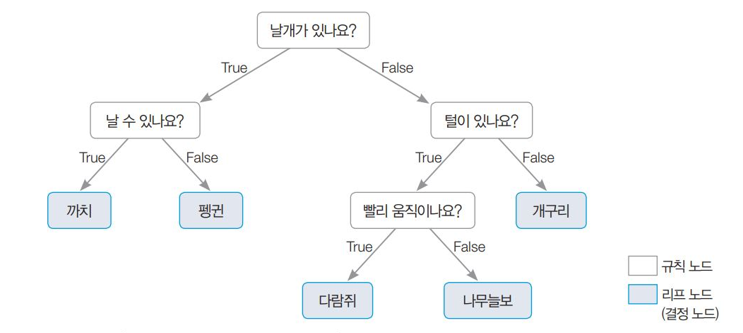

정보이득 : 엔트로피 개념
  - 엔트로피 : 데이터 집합의 혼잡도
    - 데이터집합에 다른 데이터를 추가-> 균일도가 떨어짐 -> 혼잡도가 높아진고 엔트로피는 높아짐
    - 데이터집합에 같은 데이터를 추가-> 균일도가 높아짐 -> 혼잡도가 떨어지고 엔트로피는 낮아짐
  - 정보이득지수: 혼잡도가 줄어들어 얻게 되는 이득 (1-엔트로피)
  - 결정트리 : 정보이득지수가 높은 피처를 분할 기준

지니계수
  - 경제학용어:소득불균형을나타냄,
  - 지니계수가 높을수도록 순도가 낮은 데이터
  - 지니계수가 0이면 완전 순수한 데이터 집합
  - 결정트리 : 지니계수가 낮은 피처를 분할 기준으로 사용

# 주요파라메터
  - min_samples_plit : 노드분할을 위한 최소 샘플데이터 수
  - min_sample_leaf : 리프노드가 되기 위한 최소 샘플 데이터 ㅅ ㅜ
  - max_features : 최대 피처수
  - max_depth : 트리의 최대 높이
  - max_deaf_nodes : 리프 노드에 들어가는 최대 셈플수

In [10]:
# https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

In [11]:
!unzip /content/drive/MyDrive/data/uci/human+activity+recognition+using+smartphones.zip -d data

Archive:  /content/drive/MyDrive/data/uci/human+activity+recognition+using+smartphones.zip
replace data/UCI HAR Dataset.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: data/UCI HAR Dataset.names  
 extracting: data/UCI HAR Dataset.zip  


In [12]:
!unzip '/content/data/UCI HAR Dataset.zip' -d data

Archive:  /content/data/UCI HAR Dataset.zip
replace data/UCI HAR Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/UCI HAR Dataset/.DS_Store  
  inflating: data/__MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: data/UCI HAR Dataset/activity_labels.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: data/UCI HAR Dataset/features.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._features.txt  
  inflating: data/UCI HAR Dataset/features_info.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: data/UCI HAR Dataset/README.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._README.txt  
  inflating: data/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: data/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_

In [13]:
import pandas as pd
feature_name_df = pd.read_csv('/content/data/UCI HAR Dataset/features.txt', sep='\s+', header=None,names=['index','feature_name'])
feature_name_df.head()

index       feature_name
0      1  tBodyAcc-mean()-X
1      2  tBodyAcc-mean()-Y
2      3  tBodyAcc-mean()-Z
3      4   tBodyAcc-std()-X
4      5   tBodyAcc-std()-Y

In [33]:
X_train = pd.read_csv('/content/data/UCI HAR Dataset/train/X_train.txt',sep='\s+',header=None)
y_train = pd.read_csv('/content/data/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None)

In [34]:
# feature name 추출
feature_name = feature_name_df.iloc[:,1].to_numpy().tolist()

In [35]:
X_train.shape, y_train.shape, feature_name_df.shape

((7352, 561), (7352, 1), (561, 2))

In [36]:
X_train.columns = feature_name

In [37]:
X_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0         -0.923527         -0.934724  ...                        -0.074323   
1         -0.957686         -0.943068  ...                         0.158075   
2         -0.977469         -0.938692  ...                         0.414503   
3         -0.989302         -0.938692  ...                         0.404573   
4         -0.990441         -0.942469  ...                         0.087753   

   fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
0                        -0.298676                        -0.710304   
1                        -0.595051                        -0.861499   
2                        -0.390748                        -0.760104   
3                        -0.117290                        -0.482845   
4                        -0.351471                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  
0             -0.841247              0.179941             -0.058627  
1             -0.844788              0.180289             -0.054317  
2             -0.848933              0.180637             -0.049118  
3             -0.848649              0.181935             -0.047663  
4             -0.847865              0.185151             -0.043892  

[5 rows x 561 columns]

In [38]:
X_train['target'] = y_train

In [39]:
X_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.923527         -0.934724  ...                        -0.298676   
1         -0.957686         -0.943068  ...                        -0.595051   
2         -0.977469         -0.938692  ...                        -0.390748   
3         -0.989302         -0.938692  ...                        -0.117290   
4         -0.990441         -0.942469  ...                        -0.351471   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.710304                    -0.112754   
1                        -0.861499                     0.053477   
2                        -0.760104                    -0.118559   
3                        -0.482845                    -0.036788   
4                        -0.699205                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  target  
0              0.179941             -0.058627       5  
1              0.180289             -0.054317       5  
2              0.180637             -0.049118       5  
3              0.181935             -0.047663       5  
4              0.185151             -0.043892       5  

[5 rows x 562 columns]

# target 값 시각화

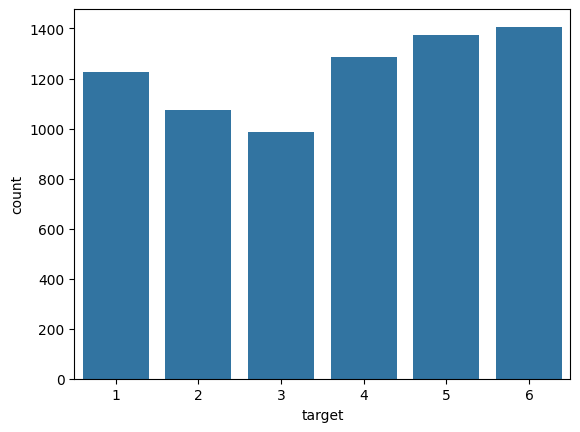

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target',data=X_train)
plt.show()